<a href="https://colab.research.google.com/github/ErbolTakhirov/Learning-notebooks/blob/main/pandas/pandas_groupby_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Group By - doing aggregates in smaller groups

Позволяет сгруппировать датасет по значениям одной колонки, как например мы группировали недавно пробег и цену машины по году выпуска.

Сама по себе не работает, а точнее возвращает специальный объект группировки. Чтобы получить серию или датафрейм, нужно указать функцию, напрмер mean(), std(), median(), min(), max(), count(), size(), sum()

`Syntax of DataFrame.groupby()`

*DataFrame.groupby(<br>
  by=None, <br>
  axis=0, <br>
  level=None, <br>
  as_index=True, <br>
  sort=True, <br>
  group_keys=True, <br>
  squeeze=<no_default>, <br>
  observed=False, <br>
  dropna=True)*<br>

`by` – List of column names to group by <br>
`axis` – Default to 0. It takes 0 or ‘index’, 1 or ‘columns’ <br>
`level` – Used with MultiIndex. <br>
`as_index` – sql style grouped otput. <br>
`sort` – Default to True. Specify whether to sort after group <br>
`group_keys` – add group keys or not <br>
`squeeze` – depricated in new versions <br>
`observed` – This only applies if any of the groupers are Categoricals. <br>
`dropna` – Default to False. Use True to drop None/Nan on sory keys <br>

In [ ]:
df = pd.DataFrame({
    "team": ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'C'],
    "region": ['AMERICAS', 'AMERICAS', 'EMEA', 'EMEA', 'AMERICAS', 'APJ', 'APJ', 'EMEA'],
    "student_height": [1.5, 2.2, 1.2, 1.1, 1.6, 1.7, 2.1, 1.2],
    "student_shoe_size": [6,5, 10, 9, 4, 7, 5, 7],
})
df

,team,region,student_height,student_shoe_size
0,A,AMERICAS,1.5,6
1,A,AMERICAS,2.2,5
2,A,EMEA,1.2,10
3,A,EMEA,1.1,9
4,B,AMERICAS,1.6,4
5,B,APJ,1.7,7
6,B,APJ,2.1,5
7,C,EMEA,1.2,7


In [ ]:
df.groupby('team') # получаем groupby объект

In [ ]:
df.groupby('team').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df.groupby('team').student_height.mean()

,student_height
team,
A,1.5
B,1.8
C,1.2


In [ ]:
df.groupby('team').mean(numeric_only=True)

,student_height,student_shoe_size
team,,
A,1.5,7.500000
B,1.8,5.333333
C,1.2,7.000000


Обратите внимание на индексы, они соответствуют уникальным значениям в колонке, по которой мы группировали датафрейм.

Можно сделать так, чтобы они стали колонкой, а не индексами, указав параметр *as_index=False*

In [ ]:
df.groupby('team', as_index=False).std(numeric_only=True)

,team,student_height,student_shoe_size
0,A,0.496655,2.380476
1,B,0.264575,1.527525
2,C,NaN,NaN


In [ ]:
df.groupby('team', as_index=False).mean(numeric_only=True)

,team,student_height,student_shoe_size
0,A,1.5,7.500000
1,B,1.8,5.333333
2,C,1.2,7.000000


In [ ]:
# можно подавать больше чем одну колонку для группировки, тогда мы получим мульти индекс

mult_index = df.groupby(['team','region']).count()

In [ ]:
mult_index.index

MultiIndex([('A', 'AMERICAS'),
            ('A',     'EMEA'),
            ('B', 'AMERICAS'),
            ('B',      'APJ'),
            ('C',     'EMEA')],
           names=['team', 'region'])

In [ ]:
mult_index.loc[['A', 'AMERICAS'], :]

KeyError: "['AMERICAS'] not in index"

groupby() часто бывает полезен для быстрой визуализации. Например давайте построим барплот со средним размером ноги игроков по регионам:

In [ ]:
df_2 = df.groupby('region').mean(numeric_only=True).student_shoe_size
df_2

,student_shoe_size
region,
AMERICAS,5.000000
APJ,6.000000
EMEA,8.666667


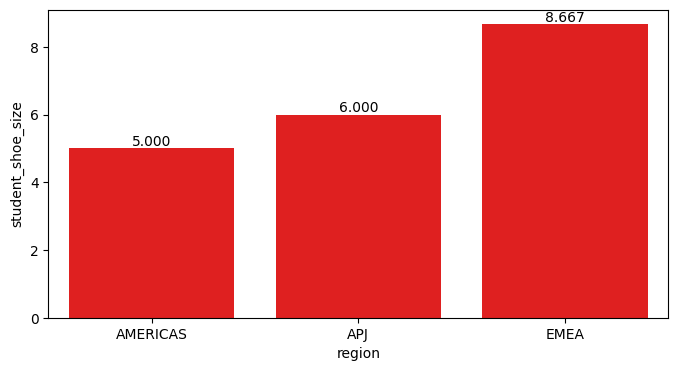

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(df_2, color='red', ax=ax)

# Подпись значений для каждого столбца
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height(),
            f'{p.get_height():.3f}',
            ha='center', va='bottom')

# aggregate()
Метод aggregate() (или agg()) в pandas используется для применения одной или нескольких агрегирующих функций к каждому столбцу или группе столбцов в DataFrame. Он работает как более гибкая и мощная альтернатива таким методам, как sum(), mean(), min() и max().

Когда вы используете agg() после groupby(), он выполняет вычисления для каждой группы, созданной с помощью groupby(), и возвращает DataFrame с агрегированными результатами.

In [ ]:
df.groupby('team').aggregate('mean', numeric_only=True) # одна функция для всех столбцов, тоже нуждается в numeric_only=True

,student_height,student_shoe_size
team,,
A,1.5,7.500000
B,1.8,5.333333
C,1.2,7.000000


In [ ]:
df.groupby('region').agg({'student_height': 'min',    # можно уточнить, к какому столбцу какая функция применяется
                          'student_shoe_size': 'max'}) # count и size очень похожи, возвращают количество строк в категории, но count считает только заполненные

,student_height,student_shoe_size
region,,
AMERICAS,1.5,6
APJ,1.7,7
EMEA,1.1,10


In [ ]:
df.groupby('team').agg(['mean', 'min', 'max'], numeric_only=True)

TypeError: Cannot use numeric_only=True with SeriesGroupBy.mean and non-numeric dtypes.

In [ ]:
df.groupby('team').agg({
    'student_height': ['mean', 'min', 'max'],
    'student_shoe_size': ['mean', 'min', 'max']})

student_height           student_shoe_size        
               mean  min  max              mean min max
team                                                   
A               1.5  1.1  2.2          7.500000   5  10
B               1.8  1.6  2.1          5.333333   4   7
C               1.2  1.2  1.2          7.000000   7   7

In [ ]:
df.groupby('team').agg({
    'student_height': ['mean', 'min', 'max'],
    'student_shoe_size': ['mean', 'min', 'max']}).student_height['min']

,min
team,
A,1.1
B,1.6
C,1.2


In [ ]:
df.groupby('team').agg({
    'student_height': ['mean', 'min', 'max'],
    'student_shoe_size': ['mean', 'min', 'max']}).student_height[['min', 'mean']]

,min,mean
team,,
A,1.1,1.5
B,1.6,1.8
C,1.2,1.2


In [ ]:
test = df.groupby('team').agg({
    'student_height': ['mean', 'min', 'max'],
    'student_shoe_size': ['mean', 'min', 'max']})

In [ ]:
test

student_height           student_shoe_size        
               mean  min  max              mean min max
team                                                   
A               1.5  1.1  2.2          7.500000   5  10
B               1.8  1.6  2.1          5.333333   4   7
C               1.2  1.2  1.2          7.000000   7   7

# transform()
Еще одна исключительно полезная функция. Метод transform() в pandas позволяет применять функцию к каждой группе, но при этом возвращает результат, имеющий тот же размер, что и исходный датафрейм. Это его ключевое отличие от agg(), который схлопывает каждую группу в одну строку.

Как это работает:

Датафрейм группируется по заданному критерию (например, по столбцу 'team').

К каждой группе применяется функция, которую вы передаёте в transform().

Результат применения функции к каждой группе "растягивается" до исходного размера группы. Все эти "растянутые" результаты затем объединяются в новую серию или датафрейм.

Это делает transform() очень полезным для задач, где вам нужно вычислить какое-то значение для каждой группы, а затем использовать это значение для обновления или создания нового столбца в исходном датафрейме, например создать новую колонку со средним пробегом в зависимости от года выпуска машины.

In [ ]:
technologies   = ({
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python","NA"],
    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000,1500],
    'Duration':['30days','50days','55days','40days','60days','35days','30days','50days','40days'],
    'Discount':[1000,2300,1000,1200,2500,None,1400,1600,0]
          })
technologies = pd.DataFrame(technologies)
technologies

,Courses,Fee,Duration,Discount
0,Spark,22000,30days,1000.0
1,PySpark,25000,50days,2300.0
2,Hadoop,23000,55days,1000.0
3,Python,24000,40days,1200.0
4,Pandas,26000,60days,2500.0
5,Hadoop,25000,35days,NaN
6,Spark,25000,30days,1400.0
7,Python,22000,50days,1600.0
8,NA,1500,40days,0.0


In [ ]:
technologies.groupby('Courses').Fee.transform('mean').astype(int)

,Fee
0,23500
1,25000
2,24000
3,23000
4,26000
5,24000
6,23500
7,23000
8,1500


In [ ]:
technologies['mean_fee'] = technologies.groupby('Courses').Fee.transform('mean').astype(int)
technologies

,Courses,Fee,Duration,Discount,mean_fee
0,Spark,22000,30days,1000.0,23500
1,PySpark,25000,50days,2300.0,25000
2,Hadoop,23000,55days,1000.0,24000
3,Python,24000,40days,1200.0,23000
4,Pandas,26000,60days,2500.0,26000
5,Hadoop,25000,35days,NaN,24000
6,Spark,25000,30days,1400.0,23500
7,Python,22000,50days,1600.0,23000
8,NA,1500,40days,0.0,1500


Давайте заполним пропуски в колонке *Discount* c помощью нового метода

In [ ]:
technologies['mean_discount'] = technologies.groupby('Discount').Fee.transform('mean')
technologies

,Courses,Fee,Duration,Discount,mean_fee,mean_discount
0,Spark,22000,30days,1000.0,23500,22500.0
1,PySpark,25000,50days,2300.0,25000,25000.0
2,Hadoop,23000,55days,1000.0,24000,22500.0
3,Python,24000,40days,1200.0,23000,24000.0
4,Pandas,26000,60days,2500.0,26000,26000.0
5,Hadoop,25000,35days,NaN,24000,NaN
6,Spark,25000,30days,1400.0,23500,25000.0
7,Python,22000,50days,1600.0,23000,22000.0
8,NA,1500,40days,0.0,1500,1500.0


In [ ]:
technologies.groupby(['Courses']).Discount.transform('mean')

,Discount
0,1200.0
1,2300.0
2,1000.0
3,1400.0
4,2500.0
5,1000.0
6,1200.0
7,1400.0
8,0.0


In [ ]:
technologies.Discount.fillna(technologies.groupby(['Courses']).Discount.transform('mean'), inplace=True)
technologies

/tmp/ipython-input-1218787636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  technologies.Discount.fillna(technologies.groupby(['Courses']).Discount.transform('mean'), inplace=True)


,Courses,Fee,Duration,Discount,mean_fee,mean_discount
0,Spark,22000,30days,1000.0,23500,22500.0
1,PySpark,25000,50days,2300.0,25000,25000.0
2,Hadoop,23000,55days,1000.0,24000,22500.0
3,Python,24000,40days,1200.0,23000,24000.0
4,Pandas,26000,60days,2500.0,26000,26000.0
5,Hadoop,25000,35days,1000.0,24000,NaN
6,Spark,25000,30days,1400.0,23500,25000.0
7,Python,22000,50days,1600.0,23000,22000.0
8,NA,1500,40days,0.0,1500,1500.0


Колонки, полученные с помощью метода transform() можно использовать для фильтрации. Напимер давайте найдем всех студентов с ростом выше среднего и добавим это как признак в нашу таблицу

In [ ]:
df['is_taller_than_avg'] = df['student_height'] > df.groupby('team')['student_height'].transform('mean')
df[df['is_taller_than_avg']]

,team,region,student_height,student_shoe_size,is_taller_than_avg
1,A,AMERICAS,2.2,5,True
6,B,APJ,2.1,5,True


# Немного практики

# 3. Lab

### 3.1 Download the dataset from 'https://raw.githubusercontent.com/golden-ratio/My_DS_course/main/supermarket_sales.csv'

In [ ]:
!wget('https://raw.githubusercontent.com//golden-ratio//My_DS_course//main//supermarket_sales.csv')


/bin/bash: -c: line 1: syntax error near unexpected token `'https://raw.githubusercontent.com//golden-ratio//My_DS_course//main//supermarket_sales.csv''
/bin/bash: -c: line 1: `wget('https://raw.githubusercontent.com//golden-ratio//My_DS_course//main//supermarket_sales.csv')'


### 3.2 Load the dataset into a dataframe using read_csv from 'https://raw.githubusercontent.com/golden-ratio/My_DS_course/main/supermarket_sales.csv'

In [ ]:
dff = pd.read_csv('https://raw.githubusercontent.com/golden-ratio/My_DS_course/main/supermarket_sales.csv')
dff.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### 3.3 Find mean `TOTAL` by `CITY` and sort, using group by
Сгруппировать по городу, найти средний общий счет (TOTAL), отсортировать

In [ ]:
dff.groupby('City')['Total'].transform('sum').sort_values(ascending = False)

,Total
995,110568.7065
994,110568.7065
1,110568.7065
974,110568.7065
963,110568.7065
...,...
186,106197.6720
185,106197.6720
654,106197.6720
653,106197.6720


In [ ]:
dff.City.value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


#### 3.4 Find total `units_sold` by `CITY` and sort, using group by
Найти количество проданных продуктов, сгруппировав по городу, отсортировать.

Построить барплот

In [ ]:
#4
sum_quan = dff.groupby('City')['Quantity'].sum()

#5
dff.groupby(['City','Customer type'])['Quantity'].sum().sort_values()

#6
dff.groupby('Customer type')[['Quantity','Total']].sum()

#7
Yangon = dff[dff['City'] == 'Yangon']
Yangon.groupby('Customer type')['Quantity'].size()

#8
dff.groupby(['City', 'Gender'])['Quantity'].agg({'Quantity':'mean'})

SpecificationError: nested renamer is not supported

In [ ]:
dff.groupby(['City', 'Gender'])['Quantity'].agg({'Quantity':'mean',
                                                 'Total':'sum'})

In [ ]:
dff.groupby('Customer type').agg({'Quantity': 'size', 'Total': 'sum'})

,Quantity,Total
Customer type,,
Member,501,164223.444
Normal,499,158743.305


In [ ]:
sum_quan = dff.groupby('City')['Quantity'].sum()

In [ ]:
sum_quan

,Quantity
City,
Mandalay,1820
Naypyitaw,1831
Yangon,1859


<Axes: xlabel='City', ylabel='Quantity'>

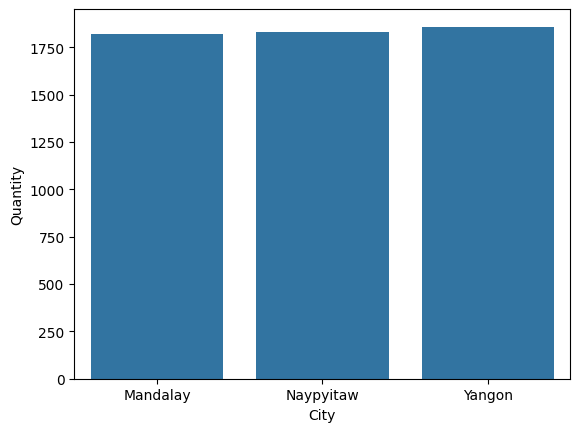

In [ ]:
sns.barplot(x = sum_quan.index, y = sum_quan)

#### 3.5 Find total `units_sold` by `CITY` & `CUSTOMER TYPE` and sort, using group by

Найти количество проданных продуктов, сгруппировав по городу и типу клиента, отсортировать

In [ ]:
dff.groupby(['City','Customer type'])['Quantity'].sum().sort_values()

,,Quantity
City,Customer type,
Yangon,Normal,895
Mandalay,Normal,896
Naypyitaw,Member,897
Mandalay,Member,924
Naypyitaw,Normal,934
Yangon,Member,964


#### 3.6 Find total `units_sold, total_sales` by `CUSTOMER TYPE` and sort, using group by
Найти количество проданных продуктов и их общую стоимость, сгруппировав по типу клиента, отсортировать

In [ ]:
dff.groupby('Customer type')[['Quantity','Total']].sum()

,Quantity,Total
Customer type,,
Member,2785,164223.444
Normal,2725,158743.305


#### 3.7 For `CITY == Yangon` group by `Customer type` and sum(`store_sales`)
Отфильтруйте только операции для города Yangon и найдите общую сумму продаж для разных типов клиентов

In [ ]:
Yangon = dff[dff['City'] == 'Yangon']
Yangon.groupby('Customer type')['Quantity'].size()

In [ ]:
Yangon = dff[dff['City'] == 'Yangon']

In [ ]:
Yangon.groupby('Customer type')['Quantity'].size()

,Quantity
Customer type,
Member,167
Normal,173


Найдите средний рейтинг, среднее количество покупок и общую сумму для мужчин и женщин в разных городах (группировка по полу и городам)

In [ ]:
dff.groupby(['City', 'Gender'])['Quantity'].mean()

City       Gender
Mandalay   Female    5.623457
           Male      5.347059
Naypyitaw  Female    5.893258
           Male      5.213333
Yangon     Female    5.645963
           Male      5.307263
Name: Quantity, dtype: float64

In [ ]:
dff['avg'] = dff.groupby('Branch').Quantity.transform('mean')

In [ ]:
dff['avg_rating'] = dff.groupby('City').Rating.transform('mean')
dff['avg_total'] = dff.groupby(['Customer type','Branch']).Total.transform('mean')
dff.loc[dff['Total'] > dff['avg_total']]

In [ ]:
dff['avg_rating'] = dff.groupby('City').Rating.transform('mean')

In [ ]:
dff['avg_total'] = dff.groupby(['Customer type','Branch']).Total.transform('mean')

In [ ]:
dff.loc[dff['Total'] > dff['avg_total']]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,avg,avg_rating,avg_total
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5.467647,7.027059,321.182488
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,5.467647,7.027059,303.831763
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,5.467647,7.027059,321.182488
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,5.467647,7.027059,303.831763
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,5.582317,7.072866,337.656755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3,5.582317,7.072866,336.575636
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4,5.481928,6.818072,325.482945
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0,5.481928,6.818072,314.329257
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,5.481928,6.818072,314.329257


In [ ]:
dff

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,avg,avg_rating,avg_total
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5.467647,7.027059,321.182488
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,5.582317,7.072866,337.656755
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,5.467647,7.027059,303.831763
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,5.467647,7.027059,321.182488
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,5.467647,7.027059,303.831763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,5.582317,7.072866,337.656755
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,5.481928,6.818072,314.329257
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,5.467647,7.027059,321.182488
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,5.467647,7.027059,303.831763


In [ ]:
technologies.groupby('Courses').Fee.transform('mean').astype(int)